Case Study - 🚑 911 Calls

Fire, Traffic and EMS(Emergency Medical Services) for Montgomery County, Pennsylvania (PA).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Assuming we are data scientist working with 911. What kind of data would you require?
Call Logs
Call Volumes - Number of calls per day
Duration of calls
How many employees and their call engagements

In [2]:
data_path = 'data/911.csv'
df = pd.read_csv(data_path)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.shape

(663522, 9)

In [5]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


Data Dictionary
lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1)
All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our data analysis skills!

First some basic questions: (ToDo)

From where the calls come most?
Which are top townships for calls?
How many unique title?
What is the reason for most calls?

Problem Statement: Estimating Emergency Calls at a 911 Call Center

Background: You're managing a 911 call center and you want to estimate how many emergency calls you can expect to receive during different hours of the day.

Can we estimate the number of emergency calls that the 911 call center may receive in a given time period?

If yes, this information can help in resource allocation, staffing, and capacity planning.

How many calls per day per hour?

In [3]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        583323 non-null  float64       
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 45.6+ MB


In [4]:
df['timeStamp'].dt.hour

0         17
1         17
2         14
3         16
4         16
          ..
663517    15
663518    15
663519    15
663520    15
663521    15
Name: timeStamp, Length: 663522, dtype: int32

In [9]:
df['timeStamp'].dt.date

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: timeStamp, Length: 663522, dtype: object

In [5]:
df['hour'] = df['timeStamp'].dt.hour
df['date'] = df['timeStamp'].dt.strftime('%Y-%m-%d')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,2015-12-10


In [12]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'hour', 'date'],
      dtype='object')

In [6]:
# let's groupby based on the date and hour

group_df = df.groupby(['date', 'hour'])
group_df.groups

{('2015-12-10', 14): [2], ('2015-12-10', 15): [5], ('2015-12-10', 16): [3, 4, 6, 7, 8, 11], ('2015-12-10', 17): [0, 1, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24], ('2015-12-10', 18): [23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], ('2015-12-10', 19): [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69], ('2015-12-10', 20): [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84], ('2015-12-10', 21): [85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95], ('2015-12-10', 22): [96, 97, 98, 99, 100, 101, 102, 103, 104, 105], ('2015-12-10', 23): [106, 107, 108, 109, 110, 111, 112, 113], ('2015-12-11', 0): [114, 115, 116], ('2015-12-11', 1): [117, 118, 119, 120], ('2015-12-11', 2): [121, 122, 123, 124], ('2015-12-11', 3): [125, 126, 127, 128, 129, 130, 131, 132, 133], ('2015-12-11', 4): [134, 135, 136, 137, 138, 139], ('2015-12-11', 5): [140, 141, 142, 143, 144], ('2015-12-11', 6): [145, 146, 147, 148

In [7]:
group_df.get_group(name=('2015-12-10', 17))

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,2015-12-10
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,17,2015-12-10
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:33:50,MONTGOMERY,RT202 PKWY & KNAPP RD,1,17,2015-12-10
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:15:49,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,17,2015-12-10
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:12:47,CHELTENHAM,OLD YORK RD & VALLEY RD,1,17,2015-12-10
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:09:49,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1,17,2015-12-10
15,40.223778,-75.235399,STUMP RD & WITCHWOOD DR; MONTGOMERY; 2015-12-1...,18936.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:31:00,MONTGOMERY,STUMP RD & WITCHWOOD DR,1,17,2015-12-10
16,40.243258,-75.286552,SUSQUEHANNA AVE & W MAIN ST; LANSDALE; Statio...,19446.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:42:44,LANSDALE,SUSQUEHANNA AVE & W MAIN ST,1,17,2015-12-10
17,40.312181,-75.574260,CHARLOTTE ST & MILES RD; NEW HANOVER; Station...,19525.0,EMS: DIZZINESS,2015-12-10 17:41:54,NEW HANOVER,CHARLOTTE ST & MILES RD,1,17,2015-12-10


In [8]:
calls =group_df['timeStamp'].count().reset_index()
calls.head()

,date,hour,timeStamp
0,2015-12-10,14,1
1,2015-12-10,15,1
2,2015-12-10,16,6
3,2015-12-10,17,16
4,2015-12-10,18,26


In [11]:
calls.columns = ['date','hour','calls']
calls.head()

,date,hour,calls
0,2015-12-10,14,1
1,2015-12-10,15,1
2,2015-12-10,16,6
3,2015-12-10,17,16
4,2015-12-10,18,26


In [12]:
pd.pivot_table(data=calls,
               values='calls',
               index='date',
               columns='hour')

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2015-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,6.0,16.0,26.0,20.0,15.0,11.0,10.0,8.0
2015-12-11,3.0,4.0,4.0,9.0,6.0,5.0,10.0,11.0,29.0,11.0,...,23.0,28.0,27.0,39.0,24.0,32.0,11.0,12.0,16.0,7.0
2015-12-12,7.0,5.0,5.0,11.0,5.0,11.0,3.0,14.0,5.0,12.0,...,20.0,28.0,30.0,22.0,24.0,37.0,9.0,29.0,21.0,19.0
2015-12-13,9.0,5.0,5.0,8.0,2.0,4.0,8.0,13.0,14.0,11.0,...,18.0,17.0,14.0,22.0,28.0,16.0,14.0,8.0,17.0,6.0
2015-12-14,4.0,11.0,4.0,3.0,4.0,10.0,15.0,27.0,25.0,21.0,...,16.0,28.0,33.0,31.0,38.0,22.0,20.0,19.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,16.0,8.0,2.0,8.0,3.0,6.0,5.0,7.0,14.0,14.0,...,19.0,23.0,28.0,18.0,15.0,13.0,10.0,12.0,10.0,9.0
2020-07-26,6.0,7.0,8.0,8.0,6.0,3.0,7.0,6.0,13.0,16.0,...,26.0,13.0,12.0,19.0,18.0,14.0,20.0,15.0,8.0,5.0
2020-07-27,11.0,7.0,4.0,3.0,4.0,10.0,8.0,14.0,10.0,14.0,...,20.0,20.0,19.0,15.0,15.0,10.0,35.0,13.0,8.0,8.0


In [15]:
report = pd.pivot_table(data=calls,
               values='calls',
               index='date',
               columns='hour')

In [17]:
report.isnull().sum()

hour
0      7
1      8
2     17
3     14
4     11
5     11
6      2
7      4
8      1
9      2
10     2
11     3
12     2
13     4
14     1
15     1
16     2
17     2
18     2
19     3
20     2
21     2
22     3
23     4
dtype: int64

In [18]:
report.fillna(0, inplace=True)
report

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2015-12-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,6.0,16.0,26.0,20.0,15.0,11.0,10.0,8.0
2015-12-11,3.0,4.0,4.0,9.0,6.0,5.0,10.0,11.0,29.0,11.0,...,23.0,28.0,27.0,39.0,24.0,32.0,11.0,12.0,16.0,7.0
2015-12-12,7.0,5.0,5.0,11.0,5.0,11.0,3.0,14.0,5.0,12.0,...,20.0,28.0,30.0,22.0,24.0,37.0,9.0,29.0,21.0,19.0
2015-12-13,9.0,5.0,5.0,8.0,2.0,4.0,8.0,13.0,14.0,11.0,...,18.0,17.0,14.0,22.0,28.0,16.0,14.0,8.0,17.0,6.0
2015-12-14,4.0,11.0,4.0,3.0,4.0,10.0,15.0,27.0,25.0,21.0,...,16.0,28.0,33.0,31.0,38.0,22.0,20.0,19.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-25,16.0,8.0,2.0,8.0,3.0,6.0,5.0,7.0,14.0,14.0,...,19.0,23.0,28.0,18.0,15.0,13.0,10.0,12.0,10.0,9.0
2020-07-26,6.0,7.0,8.0,8.0,6.0,3.0,7.0,6.0,13.0,16.0,...,26.0,13.0,12.0,19.0,18.0,14.0,20.0,15.0,8.0,5.0
2020-07-27,11.0,7.0,4.0,3.0,4.0,10.0,8.0,14.0,10.0,14.0,...,20.0,20.0,19.0,15.0,15.0,10.0,35.0,13.0,8.0,8.0


<Axes: xlabel='hour'>

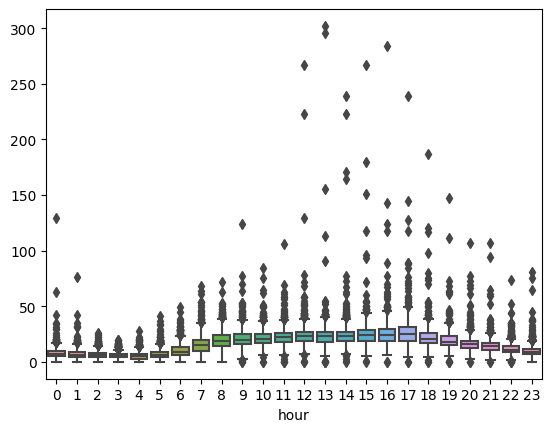

In [19]:
sns.boxplot(data=report)

<Axes: xlabel='hour', ylabel='date'>

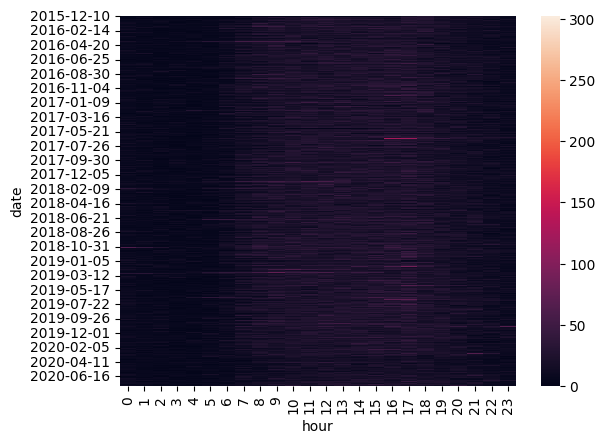

In [20]:
sns.heatmap(data=report)

OBSERVATION: Looks like numer of calls in day time is more.

In [21]:
report.median()

hour
0      7.0
1      6.0
2      6.0
3      5.0
4      5.0
5      6.0
6      9.0
7     15.0
8     19.0
9     20.0
10    21.0
11    22.0
12    23.0
13    23.0
14    23.0
15    24.0
16    24.0
17    25.0
18    21.0
19    18.0
20    16.0
21    14.0
22    11.0
23     9.0
dtype: float64

<Axes: xlabel='hour'>

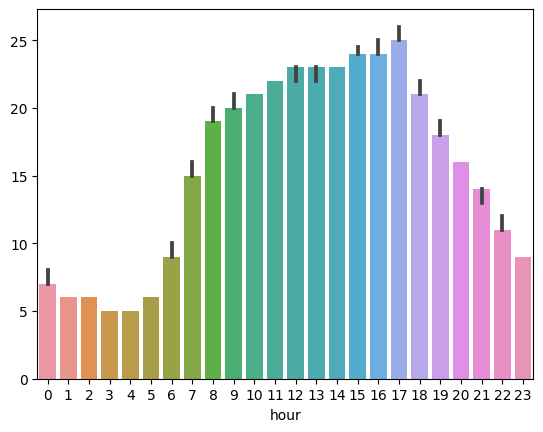

In [22]:
sns.barplot(report,estimator=np.median)

Observations

Non negative
Data is Discrete - Number of calls cannot be 2.5
Assumptions:

Each call(i.e. an event) is independent of other.
Assuming that the call every hour are coming at a constant rate. (Lambda) - i.e. During 5PM to 6PM we are getting 20, 23, 26, 20, 25, 30, etc... calls across multiple days. Lambda is the median number of calls across all the days during 5PM to 6PM.
You have historical data that shows, on average, you receive about 25 emergency calls per hour during peak times (i.e. lambda = 25).
Objective: You want to use the Poisson distribution to estimate the probabilities of different numbers of emergency calls arriving in the next hour.

In [23]:
report.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2015-12-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,6.0,16.0,26.0,20.0,15.0,11.0,10.0,8.0
2015-12-11,3.0,4.0,4.0,9.0,6.0,5.0,10.0,11.0,29.0,11.0,...,23.0,28.0,27.0,39.0,24.0,32.0,11.0,12.0,16.0,7.0
2015-12-12,7.0,5.0,5.0,11.0,5.0,11.0,3.0,14.0,5.0,12.0,...,20.0,28.0,30.0,22.0,24.0,37.0,9.0,29.0,21.0,19.0
2015-12-13,9.0,5.0,5.0,8.0,2.0,4.0,8.0,13.0,14.0,11.0,...,18.0,17.0,14.0,22.0,28.0,16.0,14.0,8.0,17.0,6.0
2015-12-14,4.0,11.0,4.0,3.0,4.0,10.0,15.0,27.0,25.0,21.0,...,16.0,28.0,33.0,31.0,38.0,22.0,20.0,19.0,10.0,10.0


In [24]:
report.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='hour')

In [28]:
h = int(input('Enter the Hour'))
while h<0 or h>23:
    print('Incorrect input. Note that the input should be an integer in the range 0 to 23.')
    h= int(input('Enter the Hour:'))
else:
    print('Input Accepted')


Input Accepted


In [29]:
report[h]

date
2015-12-10     0.0
2015-12-11    18.0
2015-12-12    25.0
2015-12-13    17.0
2015-12-14    16.0
              ... 
2020-07-25    21.0
2020-07-26    14.0
2020-07-27    30.0
2020-07-28    23.0
2020-07-29    14.0
Name: 10, Length: 1694, dtype: float64

In [30]:
report[h].value_counts()

10
21.0    115
22.0    114
18.0    106
19.0    106
20.0    105
23.0    103
24.0     95
17.0     93
16.0     89
25.0     87
26.0     74
15.0     70
27.0     59
14.0     51
13.0     43
29.0     42
28.0     36
30.0     35
12.0     34
31.0     27
32.0     26
11.0     25
33.0     23
34.0     21
9.0      20
10.0     16
8.0      11
35.0      8
40.0      7
37.0      7
36.0      7
39.0      5
38.0      4
7.0       4
6.0       4
41.0      3
42.0      3
50.0      2
0.0       2
44.0      2
49.0      2
43.0      1
4.0       1
65.0      1
51.0      1
75.0      1
62.0      1
45.0      1
84.0      1
Name: count, dtype: int64

<Axes: xlabel='10'>

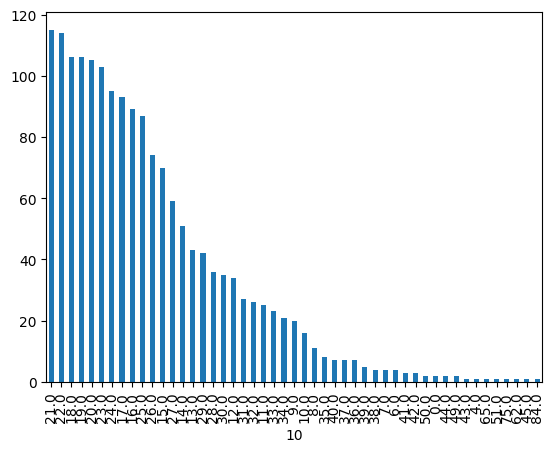

In [31]:
report[h].value_counts().plot(kind='bar')

<Axes: xlabel='10'>

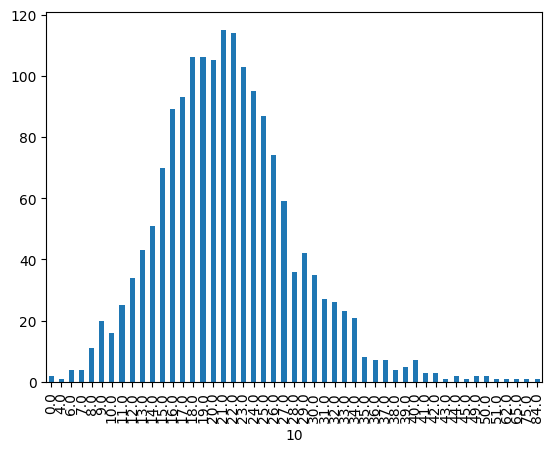

In [32]:
report[h].value_counts().sort_index().plot(kind='bar')

OBSERVATION: Looks like a Poisson Distribution (Discrete Distribution, Right Skewed)

In [33]:
# Define the average arrival rate (lambda) for the Poisson distribution
lambda_ = report[h].median()

# Define the possible number of emergency calls
min_th = int(lambda_) - 10
max_th = int(lambda_) + 10

num_calls = range(min_th, max_th)

# Calculate the probabilities for different numbers of calls
# And print the probabilities
est = []
for num in num_calls:
    if num >= 0:
        est.append([num, round(stats.poisson.pmf(num, mu=lambda_), 4)])

est_df = pd.DataFrame(est, columns=["n_calls", "prob"])

est_df

,n_calls,prob
0,11,0.0067
1,12,0.0116
2,13,0.0188
3,14,0.0282
4,15,0.0395
5,16,0.0518
6,17,0.0640
7,18,0.0747
8,19,0.0826
9,20,0.0867


Explanation: We use the Poisson distribution to estimate the probabilities of different numbers of emergency calls arriving in the next hour. The mu parameter is set to the average arrival rate.

The loop then prints out the probability of each possible number of calls.

Interpretation: This code will give you the probabilities of different numbers of emergency calls arriving in the next hour. For instance, it might tell you that there's a 10% chance of receiving exactly 25 emergency calls and a 5% chance of receiving exactly 35 calls.

By using this information, you can make decisions about how many operators to schedule, how many phone lines to keep open, and how to allocate resources effectively during different times of the day.

Preparing the Script for Data App

In [34]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,2015-12-10


In [35]:
map_data = df[['lat', 'lng']]
map_data.columns = ['lat', 'lon']
map_data.to_csv('data/map_data.csv', index=False)

In [39]:
report.to_csv("data/day_wise_hourly_report.csv")

In [40]:
def plotter(report, hour):
    fig, ax = plt.subplots(figsize=(20, 8))

    ax.set_title("Distribution of Calls")
    sns.countplot(data=report, x=hour, ax=ax)
    ax.set_xlabel(f"Number of Calls at {hour} hour")
    ax.set_ylabel("Frequency")
    
    plt.xticks(rotation=45)
    
    plt.show()

def estimation(report, hour):
    # Define the average arrival rate (lambda) for the Poisson distribution
    lambda_ = report.median()[hour]
    
    # Define the possible number of emergency calls
    min_th = int(lambda_) - 10
    max_th = int(lambda_) + 10

    num_calls = range(min_th, max_th)

    est = []
    # Calculate the probabilities for different numbers of calls
    # And print the probabilities
    for num in num_calls:
        if num >= 0:
            est.append([num, round(stats.poisson.pmf(num, mu=lambda_), 4)])
    est_df = pd.DataFrame(est, columns=["n_calls", "prob"])
    
    return est_df

In [42]:
hour = int(input("Enter the Hour:"))

while hour < 0 or hour > 23:
    print("Incorrect Input. Note that the input should be an integer in the range 0 to 23.")
    hour = int(input("Enter the Hour:"))
else:
    print("Input Accepted")

report_df = pd.read_csv("data/day_wise_hourly_report.csv")

report_df.set_index('date', inplace=True)

Input Accepted


<Axes: >

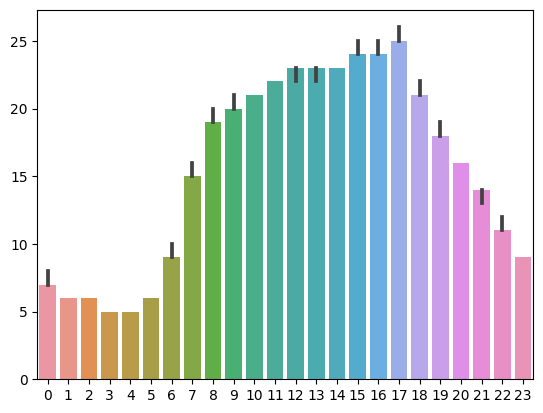

In [43]:
sns.barplot(report_df, estimator=np.median)

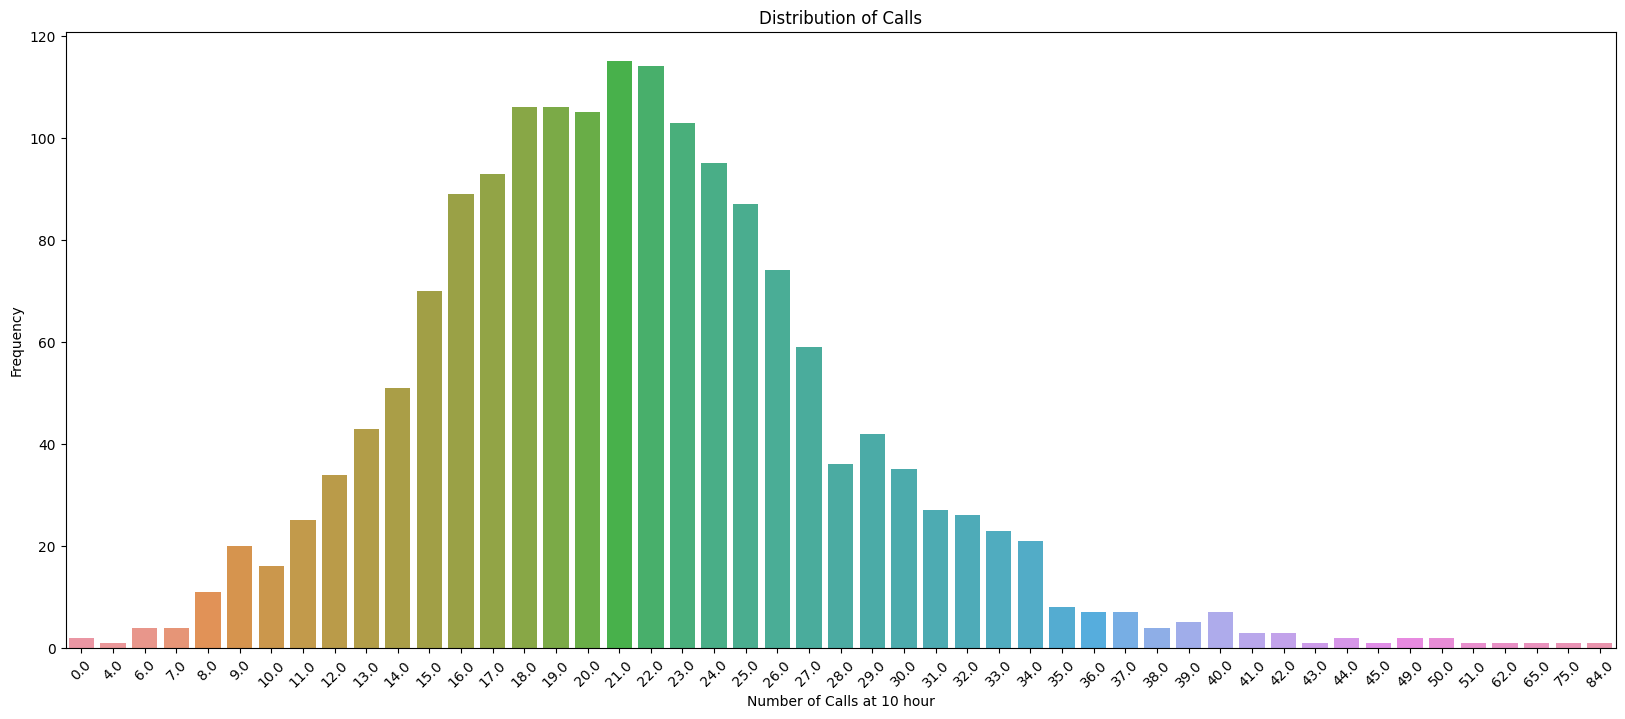

In [44]:
plotter(report_df, str(hour))

In [45]:
estimation(report_df, str(hour))

,n_calls,prob
0,11,0.0067
1,12,0.0116
2,13,0.0188
3,14,0.0282
4,15,0.0395
5,16,0.0518
6,17,0.0640
7,18,0.0747
8,19,0.0826
9,20,0.0867
